========================================================
# View CALSPEC SED 
========================================================

- author Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date May 5th 2017
- update : May 19th 2017

# Configuration with packages
---------------------------------------------

In [3]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
import os
import re

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
os.environ['PYSYN_CDBS']

'/Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs'

In [7]:
import astropy
from astropy.io import fits
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

In [8]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [9]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [10]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [11]:
from datetime import datetime
from pytz import timezone
import pytz

In [12]:
from pytz import all_timezones,common_timezones

In [13]:
from astroquery.simbad import Simbad

In [14]:
from astropy.coordinates import get_sun,get_moon

# My Definitions


Here I write the list of stars found by Mac

In [15]:
MyListOfSelectedCalspecStars=['HD111980','HD160617','HD185975','HD200654','HD205905','VB8']

# Initialisation

## Simbad

In [16]:
# Simbad.list_votable_fields()

In [17]:
# Simbad.get_field_description ('flux(filtername)') 

In [18]:
# Simbad.get_votable_fields()

In [19]:
customSimbad = Simbad()

In [20]:
customSimbad.add_votable_fields('flux(U)','flux(B)','flux(V)','flux(R)','flux(I)','flux(J)')

In [21]:
result_table = customSimbad.query_object('VEGA')   # Ask Simbad ALPHA_LYR

In [22]:
print result_table

 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001


# Query Simbad:
https://astroquery.readthedocs.io/en/latest/simbad/simbad.html

In [23]:
from astroquery.simbad import Simbad

In [24]:
SEDfile_dir=os.path.join(os.environ['PYSYN_CDBS'], 'calspec')

In [25]:
filelist=os.listdir(SEDfile_dir) 

## Extract the fits file headers

In [26]:
star_header = []
all_filelist = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(os.environ['PYSYN_CDBS'], 'calspec',filename)
        hdr = fits.getheader(fullfilename)
        star_header.append(hdr)
        all_filelist.append(filename)

    START STIS                                                                   [astropy.io.fits.card]
FILE WRITTEN BY ECHLREDUCE.PRO ON 11-Jun-2013 11:27:39.00                        [astropy.io.fits.card]
coadd list for E*H:                                                              [astropy.io.fits.card]
 o57u01030 obb001040 obb005010 obb005020 obb001010 obb001090 obb005030           [astropy.io.fits.card]
 obb005040 obb001060 obb001030 o57u01020 obb001050 obb001020 obb0010a0           [astropy.io.fits.card]
 obb001070 o6hb100f0 obb001080 o57u01040 o5i011010 o5i011020 o5i011030           [astropy.io.fits.card]
 obb0010b0 obb002090 obb0020b0 obb002010 obb002030 o6hb20060 obb002020           [astropy.io.fits.card]
 o6hb20070 obb002040 o6hb20080 obb002050 obb002060 o6hb20090 obb002070           [astropy.io.fits.card]
 obb002080 obb0020a0 obb0020c0 obb0020d0 obb004080 obb053040 obb053080           [astropy.io.fits.card]
 obb053010 obb053020 obb053030 obb053050 obb053060 obb0530a0 obb

## Extract the object name from the headers

In [27]:
star_names = []
index=0
for hdr in star_header:    
    star_name=star_header[index][7]
    star_names.append(star_name)
    index+=1

In [28]:
#star_names

In [29]:
class CalibSpecStarSmb:
    """
    Class for the CALSPEC stars from Simbad Query
    """
    name = ""          # the name of the star from CALSPEC/Pysynphot
    simbadname=""      # the name of the star returned by Astroquery-Simbad 
    RA =""             # string Right assension
    DEC=""             # string declination
    U=0                # magnitudes
    B=0
    V=0
    R=0
    I=0
    J=0
    filelist = []

    def __init__(self, name,simbname,ra,dec,u,b,v,r,i,j):   # constructor
        self.name=name
        self.simbname=simbname
        self.RA=ra
        self.DEC=dec
        self.U=u
        self.B=b
        self.V=v
        self.R=r
        self.I=i
        self.J=j
        self.filelist = []
    def setFileList(self,files):
        self.filelist=files
    def getFilelist(self):
        return self.filelist
    def show(self):                             # print 
        print 'name=',self.name,', ra=',self.RA,', dec=',self.DEC, ' V=',self.V,'mag'
    def getName(self):                          # getters
        return self.name
    def getRA(self):
        return self.RA
    def getDEC(self):
        return self.DEC  

In [30]:
class CalibSpecStarSkc:
    """
    Class for the CALSPEC stars from SkyCoord Query
    """
    name = ""          # the name of the star from CALSPEC/Pysynphot
    RA =0             # number Right ascension in deg
    DEC=0             # number declination
    
    skycoord=astropy.coordinates.SkyCoord.from_name("VEGA")  # creazy init with Vega

    def __init__(self, name,ra,dec):   # constructor
        self.name=name
        self.RA=ra
        self.DEC=dec
        self.skycoord=astropy.coordinates.SkyCoord.from_name(name)
        
    def show(self):                             # print 
        #print 'name=',self.name,', ra=',self.RA,', dec=',self.DEC
        print 'name',self.name,' :: ', self.skycoord
    def getName(self):                          # getters
        return self.name
    def getRA(self):
        return self.RA
    def getDEC(self):
        return self.DEC 
    def getSkyCoord(self):
        return self.skycoord

## Loop on entries to get info on coordinates on CALSPEC from Simbad

- This is a way to sort the good name for stars
- Moreover it does not crash if Simbad does not recognize a name

In [31]:
All_CALSPEC_Stars_InSimbad = {} #dictionnary of stars
count =0
for name in star_names: # loop on star names from Pysynphot-CALSPEC
    result_table = customSimbad.query_object(name)   # Ask Simbad
    if result_table != None:                   #check if Simbad has found the star
        count+=1
        print "---------------------",count,') ',name,'-------------------------'
        print result_table
        # create an object with the found star
        newstar=CalibSpecStarSmb(name,result_table["MAIN_ID"][0],result_table["RA"][0],result_table["DEC"][0],result_table["FLUX_U"][0],result_table["FLUX_B"][0],result_table["FLUX_V"][0],result_table["FLUX_R"][0],result_table["FLUX_I"][0],result_table["FLUX_J"][0])
        # fill the dictionnary only if there is no instance of that star already in dictionnary
        if not newstar.getName() in All_CALSPEC_Stars_InSimbad.keys():
            All_CALSPEC_Stars_InSimbad[newstar.getName()]= newstar # fill the directionary with the new star- object
            

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astropy/table/table.py:2517: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  result = (self.as_array().data == other) & (self.mask == false_mask)
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1732526 with NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1732526': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packa

--------------------- 1 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ------ --------- ---------
*  10 Lac 22 39 15.6786 +39 03 00.971       9 ...   4.98 5.1900001 5.3899999
--------------------- 2 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ------ --------- ---------
*  10 Lac 22 39 15.6786 +39 03 00.971       9 ...   4.98 5.1900001 5.3899999
--------------------- 3 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ---

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1743045': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1757132': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1802271 with NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/l

--------------------- 4 )  ALPHA_LYR -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001
--------------------- 5 )  ALPHA_LYR -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001
--------------------- 6 )  ALPHA_LYR -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... -

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME BD02D3375
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME BD17D4708 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'BD17D4708 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	BD : Bon

--------------------- 7 )  FEIGE110 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
--------- ------------- ------------- ------- ... ------ ------ ------ ------
Feige 110 23 19 58.3981 -05 09 56.160       9 ...   11.5  11.97 12.145 12.548
--------------------- 8 )  FEIGE110 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
--------- ------------- ------------- ------- ... ------ ------ ------ ------
Feige 110 23 19 58.3981 -05 09 56.160       9 ...   11.5  11.97 12.145 12.548
--------------------- 9 )  FEIGE110 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
--------- ------------- ----------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME FEIGE34 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'g191b2b mod 004.fits': this identifier has an incorrect format for catalog: 	g : Giclas
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'Bohlin, R. C. 2009, in preparation': this identifier has an incorrect for

--------------------- 13 )  G191B2B -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
----------- ------------- ------------- ------- ... ------ ------ ------ ------
BD+52   913 05 05 30.6128 +52 49 51.955       9 ...  11.69  11.93 12.108 12.543
--------------------- 14 )  G191B2B -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
----------- ------------- ------------- ------- ... ------ ------ ------ ------
BD+52   913 05 05 30.6128 +52 49 51.955       9 ...  11.69  11.93 12.108 12.543
--------------------- 15 )  G191B2B -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
----------- --

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'Rauch, Bohlin, & Kruk 2013': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME GD153 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'GD153 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	GD : Gic

--------------------- 16 )  GD153 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 GD 153 12 57 02.337 +22 01 52.68       7 ... 13.349 13.488 13.669 14.012
--------------------- 17 )  GD153 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 GD 153 12 57 02.337 +22 01 52.68       7 ... 13.349 13.488 13.669 14.012
--------------------- 18 )  GD153 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 GD 15

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME GD71 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'GD71 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	GD : Giclas, Dwarf
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : GJ  7541 A
  (

--------------------- 19 )  GD71 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  GD 71 05 52 27.614 +15 53 13.75       7 ... 13.032 13.169 13.337 13.728
--------------------- 20 )  GD71 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  GD 71 05 52 27.614 +15 53 13.75       7 ... 13.032 13.169 13.337 13.728
--------------------- 21 )  GD71 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  GD 71 0

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME AC +70D5824
  (error.line, error.msg))


 22 )  HD009051 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ...   FLUX_V  FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...    mag     mag    mag    mag  
--------- ------------- ------------- ------- ... --------- ------ ------ ------
HD   9051 01 28 46.5020 -24 20 25.443       9 ... 8.9200001     --     --  7.289
--------------------- 23 )  HD009051 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ...   FLUX_V  FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...    mag     mag    mag    mag  
--------- ------------- ------------- ------- ... --------- ------ ------ ------
HD   9051 01 28 46.5020 -24 20 25.443       9 ... 8.9200001     --     --  7.289
--------------------- 24 )  HD009051 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ...   FLUX_V  FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...    mag     mag    mag    mag  
--------- ------------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HD165459 with NICMOS observations
  (error.line, error.msg))


--------------------- 61 )  HD185975 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD 185975 20 28 18.7284 -87 28 19.941       9 ...     --     -- 6.8629999
--------------------- 62 )  HD185975 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD 185975 20 28 18.7284 -87 28 19.941       9 ...     --     -- 6.8629999
--------------------- 63 )  HD185975 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ -------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'HD209458 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	HD : Henry Draper
  (error.line, error.msg))


--------------------- 70 )  HD209458 -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
               "h:m:s"       "d:m:s"            ...  mag    mag      mag   
----------- ------------- ------------- ------- ... ------ ------ ---------
V* V376 Peg 22 03 10.7720 +18 53 03.543       9 ...     --     -- 6.5910001
--------------------- 71 )  HD209458 -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
               "h:m:s"       "d:m:s"            ...  mag    mag      mag   
----------- ------------- ------------- ------- ... ------ ------ ---------
V* V376 Peg 22 03 10.7720 +18 53 03.543       9 ...     --     -- 6.5910001
--------------------- 72 )  HD209458 -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
               "h:m:s"       "d:m:s"            ...  mag    mag      mag   
----------- ------------- ------------- ------- ...

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HD93521 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HS2027 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HS2027
  (error.line, error.msg))
/Users/dago

87 )  HD93521 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD  93521 10 48 23.5113 +37 34 13.092       9 ...     --     -- 7.4990001
--------------------- 88 )  HZ21 -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
  HZ 21 12 13 56.25 +32 56 31.4       6        6 ... 14.688 14.837 15.038 15.351
--------------------- 89 )  HZ21 -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ 

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'hz43 mod 004.fits': this identifier has an incorrect format for catalog: 	hz : Humason-Zwicky
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ43 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ43B with STIS observation

--------------------- 93 )  HZ43 -------------------------
MAIN_ID       RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
------- ------------- ------------- ------- ... ------ ------ ------ ------
  HZ 43 13 16 21.8532 +29 05 55.379       9 ...  12.66     --     -- 10.373
--------------------- 94 )  HZ43B -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 HZ 43B 13 16 21.630 +29 05 54.38       7 ...  12.66     --     -- 12.806
--------------------- 95 )  HZ43B -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ44 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ4 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF01T5 with NICMOS observations
  (error.line, erro

)  HZ44 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  HZ 44 13 23 35.264 +36 07 59.54       7 ...  11.65   12.0 11.995 12.386
--------------------- 100 )  HZ4 -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
  HZ  4 03 55 21.99 +09 47 18.0       6        6 ... 14.506  14.58 14.642 14.831
--------------------- 101 )  HZ4 -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF01T5
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF06T1 with NICMOS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF06T1
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/ana

--------------------- 103 )  LDS749B -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
LAWD 87 21 32 16.24 +00 15 14.4       6        6 ... 14.674 14.675 14.676 14.894
--------------------- 104 )  LDS749B -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
LAWD 87 21 32 16.24 +00 15 14.4       6        6 ... 14.674 14.675 14.676 14.894
--------------------- 105 )  LDS749B -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
-

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME MUCOL
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME P041C with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'P041C with STIS & NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-

--------------------- 106 )  SIRIUS -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I   FLUX_J
             "h:m:s"       "d:m:s"            ...  mag      mag      mag  
--------- ------------- ------------- ------- ... ------ ---------- ------
* alf CMa 06 45 08.9172 -16 42 58.017       9 ...  -1.46 -1.4299999  -1.36
--------------------- 107 )  SIRIUS -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I   FLUX_J
             "h:m:s"       "d:m:s"            ...  mag      mag      mag  
--------- ------------- ------------- ------- ... ------ ---------- ------
* alf CMa 06 45 08.9172 -16 42 58.017       9 ...  -1.46 -1.4299999  -1.36


/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'SNAP-1 with STIS & NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME SNAP-1
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'SNAP-2 with STIS & NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagor

--------------------- 108 )  VB8 -------------------------
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ------------ ------------ ------- ... ------ ------ ------ ------
GJ   644 C 16 55 35.293 -08 23 40.11       7 ... 16.916 14.566  12.24  9.776
--------------------- 109 )  VB8 -------------------------
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ------------ ------------ ------- ... ------ ------ ------ ------
GJ   644 C 16 55 35.293 -08 23 40.11       7 ... 16.916 14.566  12.24  9.776
--------------------- 110 )  VB8 -------------------------
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ------------ ------------ ------- ... ----

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME Koester He Model
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME Standard star flux with STIS observations--------------------------
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD0320-539 with STIS 

--------------------- 114 )  WD0320-539 -------------------------
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ----------- ------- ... ------ ------ ------ ------
LB  1663 03 22 14.83 -53 45 16.5       6 ...   14.9  15.51  15.21  15.61
--------------------- 115 )  WD0320-539 -------------------------
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ----------- ------- ... ------ ------ ------ ------
LB  1663 03 22 14.83 -53 45 16.5       6 ...   14.9  15.51  15.21  15.61
--------------------- 116 )  WD0320-539 -------------------------
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ----------- ------- ... ------ ------ ------ ------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD0947 857
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD1026 453 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD1026 453
  (error.line, error.msg))
/Users/dagoret-campagne

--------------------- 117 )  WD1057+719 -------------------------
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
----------- ----------- ----------- ------- ... ------ ------ ------ ------
PG 1057+719 11 00 34.24 +71 38 02.9       6 ...  14.68  15.23     -- 15.472
--------------------- 118 )  WD1057+719 -------------------------
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
----------- ----------- ----------- ------- ... ------ ------ ------ ------
PG 1057+719 11 00 34.24 +71 38 02.9       6 ...  14.68  15.23     -- 15.472
--------------------- 119 )  WD1057+719 -------------------------
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
----------- ----------- ----------- ------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'WD1657+343 with STIS & NICMOS observations': this identifier has an incorrect format for catalogs: 	WD (
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'WDcovar.fits': this identifier has an incorrect format for catalogs: 	WD (
  (error.line, error.msg))


In [32]:
print " Number of CALSPEC stars recognised by Simbad : ",len(All_CALSPEC_Stars_InSimbad)

 Number of CALSPEC stars recognised by Simbad :  41


### shows list of CALSPEC stars from SimBad

In [33]:
print All_CALSPEC_Stars_InSimbad.keys()

['10LAC', 'HD205905', 'HD14943', 'HD37725', 'HD160617', 'FEIGE34', 'HD159222', 'HZ43', 'HZ44', 'HZ21', 'WD1057+719', 'HZ4', 'FEIGE110', 'HD031128', 'GD71', 'HD209458', 'SIRIUS', 'WD0320-539', 'HD111980', 'HD009051', 'HD60753', 'LDS749B', 'HD180609', 'HD158485', 'HD37962', 'HD163466', 'HD185975', 'G191B2B', 'HD116405', 'ALPHA_LYR', 'HD200654', 'HZ43B', 'WD1657+343', 'HD165459', 'HD93521', 'GD153', 'WD0308-565', 'HD38949', 'VB8', 'HD106252', 'HD074000']


## From SkyCoord, also get the coordinates of the star

In [34]:
All_CALSPEC_Stars_InSkyCoord = {} #dictionnary of stars
for starnam in All_CALSPEC_Stars_InSimbad.keys():
    starloc=astropy.coordinates.SkyCoord.from_name(starnam)
    newstar=CalibSpecStarSkc(starnam,starloc.ra.deg,starloc.dec.deg)
    All_CALSPEC_Stars_InSkyCoord [starnam] = newstar

In [35]:
print " Number of CALSPEC stars recognised by SkyCoord : ",len(All_CALSPEC_Stars_InSkyCoord)

 Number of CALSPEC stars recognised by SkyCoord :  41


In [36]:
print All_CALSPEC_Stars_InSkyCoord.keys()

['10LAC', 'HD205905', 'WD0320-539', 'HD37725', 'HD160617', 'FEIGE34', 'HD159222', 'HZ43', 'HZ44', 'HZ21', 'WD1057+719', 'HZ4', 'FEIGE110', 'HD031128', 'GD71', 'HD209458', 'SIRIUS', 'ALPHA_LYR', 'HD111980', 'HD009051', 'HD60753', 'LDS749B', 'HD180609', 'HD158485', 'HD37962', 'HD163466', 'HD185975', 'G191B2B', 'HD116405', 'HD14943', 'HD200654', 'HZ43B', 'WD1657+343', 'HD165459', 'HD93521', 'GD153', 'WD0308-565', 'HD38949', 'VB8', 'HD106252', 'HD074000']


In [37]:
for key, starobj in All_CALSPEC_Stars_InSkyCoord.iteritems():
    print starobj.show()

name 10LAC  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 339.81532766,  39.05026977)>
None
name HD205905  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 324.79229796, -27.30657448)>
None
name WD0320-539  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 50.561792, -53.754583)>
None
name HD37725  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 85.47654458,  29.29747917)>
None
name HD160617  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 265.70551677, -40.32097928)>
None
name FEIGE34  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 159.90308495,  43.10257086)>
None
name HD159222  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 263.00413544,  34.27114733)>
None
name HZ43  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 199.0910417,  29.0987222)>
None
name HZ44  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 200.8969333,  36.1332056)>
None
name HZ21  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 183.484295,  32.9420947)>
None
name WD1057+719  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 165.1447937,  71.6344664)>

# SED files
--------------------



## Group all files 

In [38]:
 # filelist

### Group files according star name

In [39]:
old_star = None
for Starnam in All_CALSPEC_Stars_InSimbad.keys():
    if Starnam != old_star: 
        if old_star != None:
            All_CALSPEC_Stars_InSimbad[old_star].setFileList(star_files)
        star_files = []
        old_star=Starnam
        
    starnam=Starnam.lower()
    for file in filelist:
        if re.search(Starnam,file) or re.search(starnam,file):
            star_files.append(file)
All_CALSPEC_Stars_InSimbad[old_star].setFileList(star_files)   # don't forget last file

### View the lists of files

In [40]:
for Starnam in All_CALSPEC_Stars_InSimbad.keys():
    print Starnam, ' :: \t ',All_CALSPEC_Stars_InSimbad[Starnam].getFilelist()

10LAC  :: 	  ['10lac_stis_001.fits', '10lac_stis_002.fits', '10lac_stis_003.fits']
HD205905  :: 	  ['hd205905_stis_001.fits', 'hd205905_stis_002.fits', 'hd205905_stis_003.fits']
HD14943  :: 	  ['hd14943_stis_001.fits', 'hd14943_stis_002.fits', 'hd14943_stis_003.fits']
HD37725  :: 	  ['hd37725_stis_001.fits', 'hd37725_stis_002.fits', 'hd37725_stis_003.fits']
HD160617  :: 	  ['hd160617_stis_001.fits', 'hd160617_stis_002.fits', 'hd160617_stis_003.fits']
FEIGE34  :: 	  ['feige34_005.fits', 'feige34_stis_001.fits', 'feige34_stis_002.fits', 'feige34_stis_003.fits', 'feige34_stis_004.fits']
HD159222  :: 	  ['hd159222_stis_001.fits', 'hd159222_stis_002.fits', 'hd159222_stis_003.fits']
HZ43  :: 	  ['hz43_fos_003.fits', 'hz43_mod_004.fits', 'hz43_mod_005.fits', 'hz43_mod_008.fits', 'hz43_mod_009.fits', 'hz43_mod_010.fits', 'hz43_stis_001.fits', 'hz43_stis_002.fits', 'hz43_stis_003.fits', 'hz43_stis_004.fits', 'hz43b_stis_001.fits', 'hz43b_stis_002.fits', 'hz43b_stis_003.fits', 'hz43b_stis_004.fi

# View spectra

## View a single Spectrum

In [41]:
SELECTED_STAR_NAME='HD111980'

In [42]:
theStar=All_CALSPEC_Stars_InSimbad[SELECTED_STAR_NAME]

In [43]:
thefilelist=theStar.getFilelist()

In [44]:
thefilelist

['hd111980_stis_001.fits', 'hd111980_stis_002.fits', 'hd111980_stis_003.fits']

Filename: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/calspec/hd111980_stis_001.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3739R x 7C   [1E, 1E, 1E, 1E, 1E, 1I, 1E]   
Filename: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/calspec/hd111980_stis_002.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3739R x 7C   [1E, 1E, 1E, 1E, 1E, 1I, 1E]   
Filename: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/calspec/hd111980_stis_003.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3739R x 7C   [1D, 1E, 1E, 1E, 1E, 1I, 1E]   


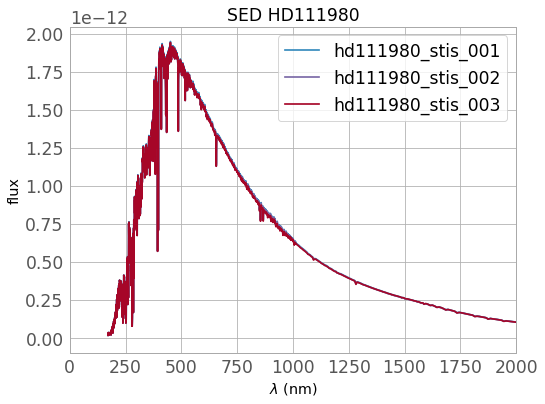

In [45]:
starname=SELECTED_STAR_NAME
for file in thefilelist:
        fullfilename=os.path.join(os.environ['PYSYN_CDBS'], 'calspec',file)
        hdulist=fits.open(fullfilename)
        hdulist.info()
        table_data=hdulist[1].data
        #print table_data.columns  # shows the columns names of the table
        wavelengths=table_data.field('WAVELENGTH')/10.
        flux=table_data.field('FLUX')
        title='SED '+starname
        plt.plot(wavelengths,flux,label=file.split('.')[0])
        plt.title(title)
        plt.ylabel('flux')
        #plt.xlabel(starburst.waveunits)
        #ylabel(starburst.fluxunits)
        plt.xlabel('$\lambda$ (nm)')
        plt.xlim(0,2000)
        plt.legend()

In [54]:
def PlotSED(starname,thefilelist):
    plt.figure()
    for file in thefilelist:
        fullfilename=os.path.join(os.environ['PYSYN_CDBS'], 'calspec',file)
        hdulist=fits.open(fullfilename)
        #hdulist.info()
        table_data=hdulist[1].data
        #print table_data.columns  # shows the columns names of the table
        wavelengths=table_data.field('WAVELENGTH')/10.
        flux=table_data.field('FLUX')
        title='SED '+starname
        plt.plot(wavelengths,flux,label=file.split('.')[0])
        plt.title(title)
        plt.ylabel('flux')
        plt.xlabel('$\lambda$ (nm)')
        plt.xlim(0,2000)
        plt.legend()
        hdulist.close()
    figfilename=starname+'.pdf'
    plt.savefig(figfilename)

In [55]:
def PlotSED2(starname,thefilelist):
    plt.figure()
    for file in thefilelist:
        fullfilename=os.path.join(os.environ['PYSYN_CDBS'], 'calspec',file)
        star_sed= S.FileSpectrum(fullfilename)        
        title='SED '+starname
        plt.plot(star_sed.wave,star_sed.flux,label=file.split('.')[0])
        plt.title(title)
        plt.ylabel(star_sed.fluxunits)
        plt.xlabel(star_sed.waveunits)
        plt.xlim(0,20000)
        plt.legend()
    figfilename=starname+'_2'+'.pdf'
    plt.savefig(figfilename)
        

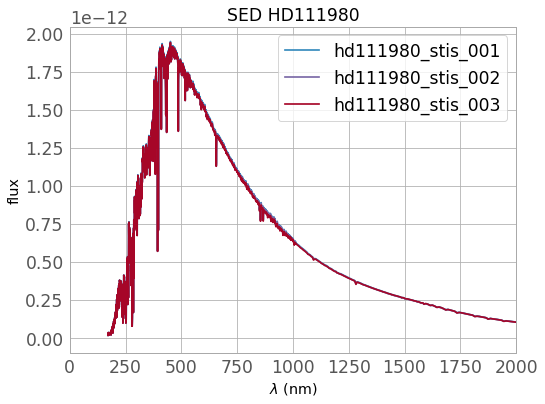

In [47]:
PlotSED(SELECTED_STAR_NAME,thefilelist)

HD205905  =  HD205905
HD160617  =  HD160617
HD111980  =  HD111980
HD185975  =  HD185975
HD200654  =  HD200654
VB8  =  VB8


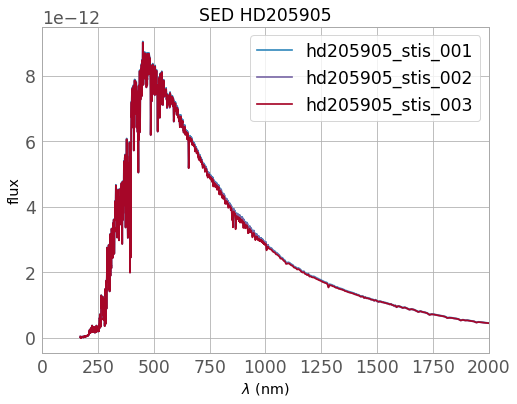

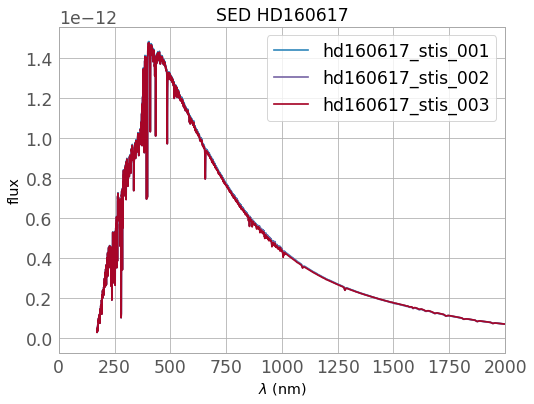

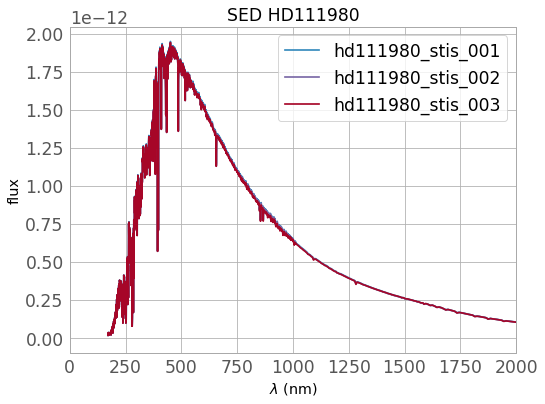

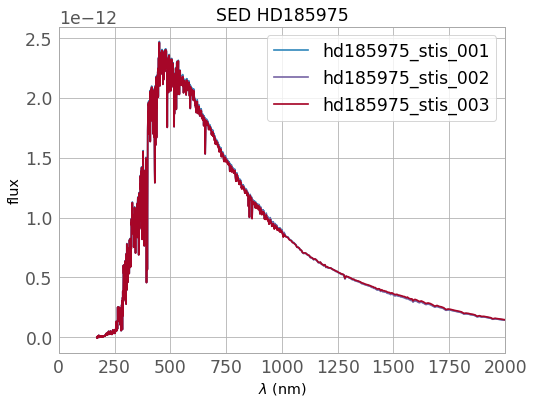

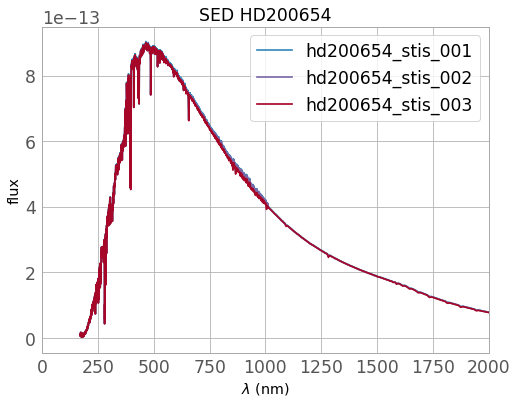

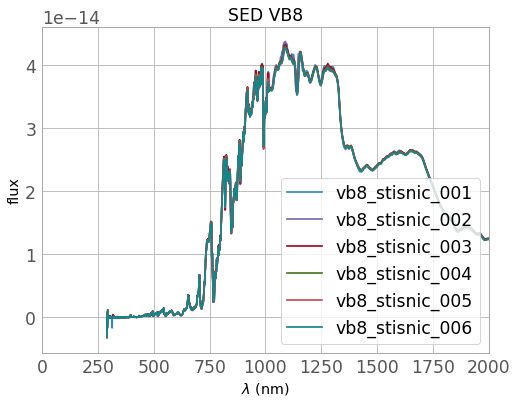

In [56]:
# Loop on all CALSPEC star found in Simbad
for Starnam in All_CALSPEC_Stars_InSimbad.keys():
    # Loop on Selected CALSPEC stars
    for starselec in MyListOfSelectedCalspecStars:
        if re.search(starselec,Starnam):
            print starselec, ' = ',Starnam
            PlotSED(Starnam,All_CALSPEC_Stars_InSimbad[Starnam].getFilelist())

HD205905  =  HD205905
Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.
HD160617  =  HD160617
HD111980  =  HD111980
HD185975  =  HD185975
Warning, 17 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 16 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 16 of 3740 bins contained negative fluxes; they have been set to zero.
HD200654  =  HD200654
VB8  =  VB8
Warning, 152 of 2229 bins contained negative fluxes; they have been set to zero.
Warning, 94 of 2216 bins contained negative fluxes; they have been set to zero.
Warning, 94 of 2215 bins contained negative fluxes; they have been set to zero.
Warning, 157 of 2236 bins contained negative fluxes; they have been set to zero.
Warning, 145 of 2236 bins contained negative fluxes; they have been set to zero

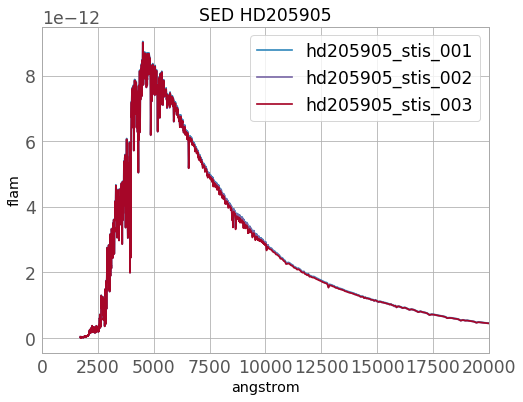

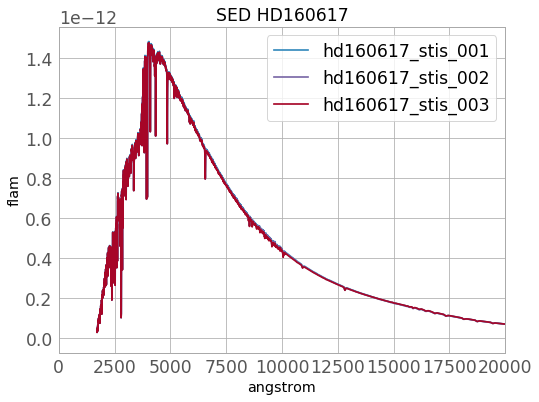

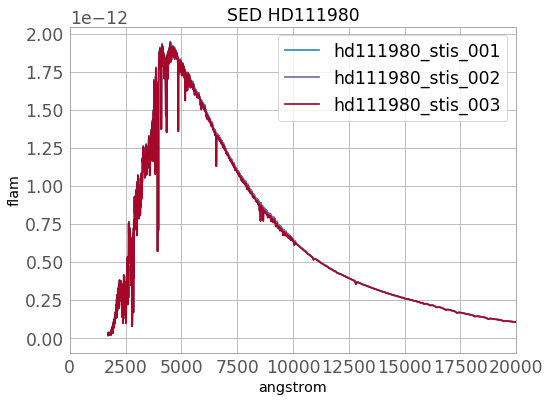

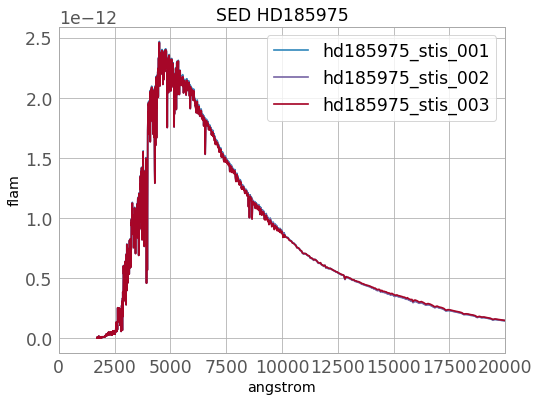

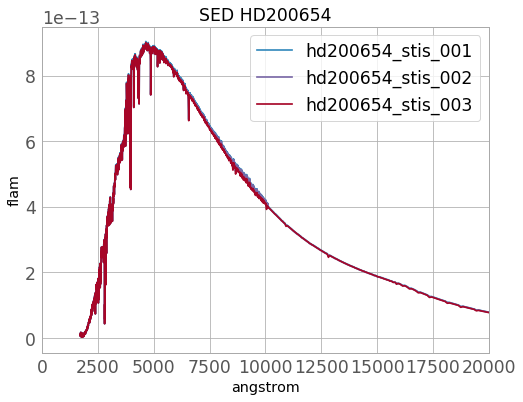

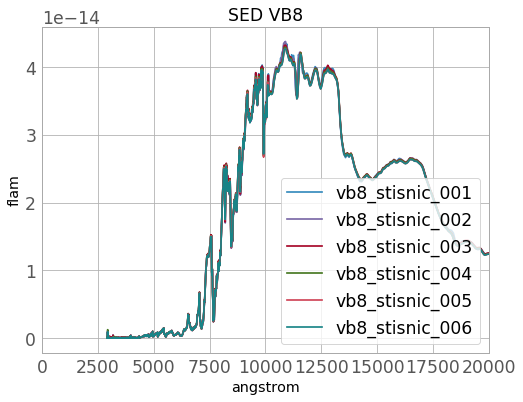

In [57]:
# Loop on all CALSPEC star found in Simbad
for Starnam in All_CALSPEC_Stars_InSimbad.keys():
    # Loop on Selected CALSPEC stars
    for starselec in MyListOfSelectedCalspecStars:
        if re.search(starselec,Starnam):
            print starselec, ' = ',Starnam
            PlotSED2(Starnam,All_CALSPEC_Stars_InSimbad[Starnam].getFilelist())